# CS 594 / CS 690 - Assignment 03
### September 17, 2018
---

For this assignment, you must work in groups of one or two students. Each person is responsible to write their own code, but the group will (together) discuss their solution.  In this notebook, we provide you with basic functions for completing the assignment.  *Complete the assignment in this notebook.  You will need to modify existing code and write new code to find a solution*.  Each member of the group must upload their own work (i.e., a notebook file) to GitHub.

*Note: Running a cell will not rerun previous cells.  If you edit code in previous cells, you must rerun those cells.  We recommend using* `Run All` *to avoid any errors results from not rerunning previous cells.  You can find this in the menu above:* `Cell -> Run All`

### Data Pre-Processing:
Below is code to process a unicode text file into a string of only upper-case A-Z characters.  We use this code to read the text file (i.e., "The Count of Monte Cristo") and prepare the text for the following three problems.  The output string, which you should use for solving the assignment problems, is named `text_upper`.

In [100]:
# Import regular expressions library
import re

# Read the text file
with open('book_CountOfMonteCristo.txt', 'r') as f:
    text_lines = f.readlines()

# Concatenate the list of strings into a single string
text_all = ''.join(text_lines)

# Remove all non-alphabet characters with a regular expression
text_alpha = re.sub(r'[^a-zA-Z]', ' ', text_all)

# Convert characters to upper-case
text_upper = text_alpha.upper()

# Uncomment the following line if you would like to see the first 100 characters
print(text_upper[:100])

PROJECT GUTENBERG S THE COUNT OF MONTE CRISTO  BY ALEXANDRE DUMAS  P RE  THIS EBOOK IS FOR THE USE O


### Problem 1:
Analyze the text for word length frequency. We might expect short words to be more common than long words. But, are words of length 2 more common than words or length 3? Are words of length 3 more common that words of length 4? **Use the text you parsed in the previous cell to count the frequency of each word length in the text**.  *Below, we provide you with the first step to solve this problem and hints for what to do next.*

In [101]:
import operator
# Convert the string of text into a list of words and remove empty words
# HINT: ref [1]
words = [w for w in text_upper.split(' ') if w is not '']

# Uncomment the following line to see the first 100 words
#print(words[:100])

# Define dictionary to store count of word lengths
# HINT: ref [2]
word_len_dict = {}

# Convert list of words to list of word lengths
# Count the words of each length and store in the dictionary
# HINT: ref [3]
for w in words:
    key = len(w)
    if key in word_len_dict:
        word_len_dict[key] = word_len_dict[key] + 1
    else:
        word_len_dict[key] = 1

# Sort word length by most common into a list of (word length, count) tuples
# HINT: ref [4,5,6]
sorted_list = sorted(word_len_dict.items(), key = operator.itemgetter(1), reverse = True)


# Print the 6 most common word lengths
# HINT: ref [7]
print("Word Length : Count")
for item in sorted_list[0:6]:
    #print(item[0], item[1])
    print("{:<11} : {:>6}".format(item[0], item[1]))

Word Length : Count
3           : 109798
2           :  84021
4           :  81777
5           :  49101
6           :  39015
7           :  30701


#### Expected Output:
```
Word Length : Count
3           : 109798
2           :  84021
4           :  81777
5           :  49101
6           :  39015
7           :  30701
```

**References:**
- [1: list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)
- [2: dictionaries](https://docs.python.org/3.6/library/stdtypes.html#dict)
- [3: for loops](https://docs.python.org/3/reference/compound_stmts.html#for)
- [4: sorted](https://docs.python.org/3/library/functions.html#sorted)
- [5: dict.items](https://docs.python.org/3.6/library/stdtypes.html#dict.items)
- [6: lambda expressions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions)
- [7: format string syntax](https://docs.python.org/3.6/library/string.html#format-string-syntax)

### Problem 2:
Analyze the text for letter frequency. If you have taken a crypto course and/or have seen substitution ciphers then you are probably aware that ’e’ is the most common letter used in the English language.  **Use the text you parsed above to count the frequency of each letter in the text**. *Below, we provide you with the first step to solve this problem and hints for what to do next.*

In [102]:
# Import string library to help us make a dictionary for this solution
import string

text_without_space = "".join(text_upper.split())
#print(text_without_space)


# Concatenate the list of words into a string of characters
# HINT: ref [1]

# Define a dictionary for counting letter frequency
# HINT: ref [2,3]
# Count the letters and store in the dictionary
char_count_dict = {c:0 for c in string.ascii_uppercase}
for c in text_without_space:
    char_count_dict[c] = char_count_dict[c] + 1

# Sort letters by most common into a list of (letter, count) tuples
sorted_list = sorted(char_count_dict.items(), key = operator.itemgetter(1), reverse = True)

# Print the 6 most common characters
# HINT: ref [4]
print("Character : Count")
for item in sorted_list[0:6]:
    #print(item[0], item[1])
    print("{:<9} : {:>6}".format(item[0], item[1]))


Character : Count
E         : 258693
T         : 180211
A         : 165306
O         : 156817
I         : 142095
N         : 137343


#### Expected Output:
```
Character : Count
E         : 258693
T         : 180211
A         : 165306
O         : 156817
I         : 142095
N         : 137343
```

**References:**
- [1: str.join](https://docs.python.org/3/library/stdtypes.html#str.join)
- [2: list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)
- [3: dictionaries](https://docs.python.org/3.6/library/stdtypes.html#dict)
- [4: format string syntax](https://docs.python.org/3.6/library/string.html#format-string-syntax)

### Problem 3:
If we really wanted to crack a substitution cipher (or win on ”Wheel of Fortune”) then we should be aware that, although "e" is the most common letter used in English, it may not be the most common first letter in a word. **Count the positional frequencies of each letter. Specifically, count the number of times each letter appears as the first letter in a word, as the last letter in a word, and as an interior letter in a word (i.e. a letter that is neither first nor last)**. *Below, we provide you with the first step to solve this problem and hints for what to do next.*

Below, we define a method which takes in a word (string) and returns a list describing the position of each letter (character).  Each item in the list has the format `(letter, position)`.  The position can have the following values: `0: first letter, 1: interior letter, 2: last letter`

In [103]:
# Define a method to return position of each character in a word
def lettersPosition(word):
    if len(word) == 1:
        # Base case for words of length 1
        return [(word, 0)]
    else:
        # Get first and last letters
        first, last = word[0], word[-1]
        pos_list = [(first, 0), (last, 2)]

        # Get interior letters
        interior = word[1:-1]
        for char in interior:
            pos_list.append((char, 1))

    return pos_list

We can call this method for each word in our list of words and sum the values to obtain letter position frequencies.

In [104]:
import string
# Define a dictionary for counting letter position frequency
char_pos_dict = {c:[0,0,0] for c in string.ascii_uppercase}

# Apply our letter location method to each word and sum values in our dictionary
for w in words:
    pos_list = lettersPosition(w)
    for item in pos_list:
        key = item[0]
        value = item[1]
        char_pos_dict[key][value] = char_pos_dict[key][value] + 1
        
# Print the position frequency of the first 6 letters in the alphabet
counter = 0
print("Character : First | Interior |  Last")
for key, value in char_pos_dict.items():
    print("{:<9} : {:>5} | {:>8} | {:>5}".format(key, value[0], value[1], value[2]))
    counter = counter + 1
    if(counter == 6):
        break


Character : First | Interior |  Last
A         : 51644 |   111686 |  1976
B         : 18866 |     8516 |   541
C         : 19577 |    32130 |   725
D         : 17289 |    18613 | 58075
E         : 10178 |   153205 | 95310
F         : 17724 |    10618 | 16988


#### Expected Output:
```
Character : First | Interior |  Last
A         : 51644 |   111686 |  1976
B         : 18866 |     8516 |   541
C         : 19577 |    32130 |   725
D         : 17289 |    18613 | 58075
E         : 10178 |   153205 | 95310
F         : 17724 |    10618 | 16988
```

### Problem 4:
For problems 1, 2, and 3 you may want to present your results in a (graphically) nice way. This could be done with a histogram. It is probably easiest to build the histogram using whatever software package you feel comfortable with, but we recommend the python module `matplotlib`. Make sure to give your plots meaningful labels (including axis labels and a title).

In [105]:
# Import matplotlib's pyplot
# HINT: ref[1]
from matplotlib import pyplot as plt

We provide the code to plot the histogram of word lengths from problem 1 below.  Use this code as a template to produce histograms for problems 2 and 3.  *Note: this code assumes that you have a dictionary, `word_len_dict`, with keys containing the word length and values containing the count of words with a given length (i.e., an entry of `3:109798` in the dictionary indicates that there are 109,798 words of length 3).*

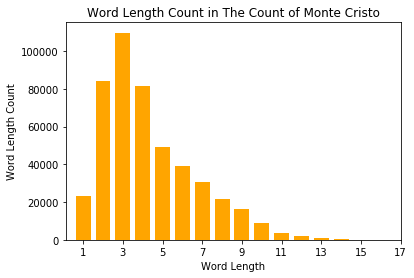

In [106]:
# Sort word length dictionary by length of word
wl_sorted = sorted(word_len_dict.items(), key=lambda x: x[0])

# Get X and Y values
# HINT: ref[2]
X_vals, Y_vals = zip(*wl_sorted)

# Plot the histogram for problem 1'
# HINT: ref[3]
plt.bar(X_vals, Y_vals, 0.75, color = 'orange')
plt.xlim((.125, len(X_vals)))
plt.xticks(range(1,len(X_vals)+1,2))
plt.xlabel('Word Length')
plt.ylabel('Word Length Count')
plt.title('Word Length Count in The Count of Monte Cristo')
plt.show()

**References:**
- [1: pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [2: zip](https://docs.python.org/3/library/functions.html#zip)
- [3: pyplot.bar](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html)

In the cell below, write the code for the visualization of results from problem 2.

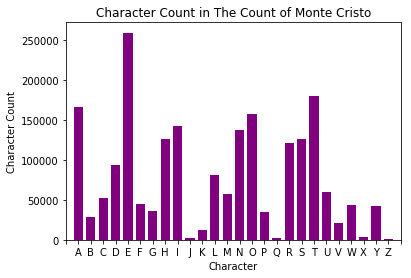

In [107]:

wl_sorted = sorted(char_count_dict.items(), key=lambda x: x[0])

# Get X and Y values
# HINT: ref[2]
X_vals, Y_vals = zip(*wl_sorted)

# Plot the histogram for problem 2'

plt.bar(X_vals, Y_vals, .75, color = 'purple')
plt.xlim((1.50, len(X_vals)))
plt.xticks(range(-1,len(X_vals)+1,1))
plt.xlabel('Character')
plt.ylabel('Character Count')
plt.title('Character Count in The Count of Monte Cristo')
plt.show()

In the cell below, write the code for the visualization of results from problem 3.

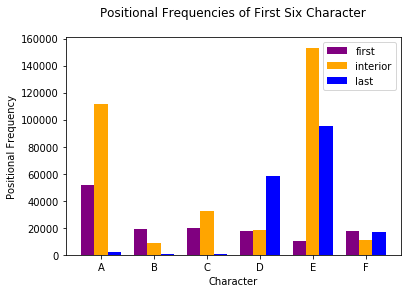

In [108]:
import numpy as np
import matplotlib.pyplot as plt

N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

counter = 0
yvals = []
zvals = []
kvals = []
for key, value in char_pos_dict.items():
    yvals.append(value[0])
    zvals.append(value[1])
    kvals.append(value[2])
    counter = counter + 1
    if(counter == 6):
        break

rects1 = ax.bar(ind, yvals, width, color='purple')
rects2 = ax.bar(ind+width, zvals, width, color='orange')
rects3 = ax.bar(ind+width*2, kvals, width, color='blue')

ax.set_ylabel('Positional Frequency')
ax.set_xlabel('Character')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('A', 'B', 'C', 'D', 'E', 'F') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('first', 'interior', 'last') )


#def autolabel(rects):
#    for rect in rects:
#        h = rect.get_height()
#        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom')
#
#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)

plt.title("Positional Frequencies of First Six Character\n")
plt.show()

### Things to Consider:
You are reading and analyzing the text in a single, sequential pass. Can you consider a better (faster) way to perform the same tasks?

### Assignment Questions:
**Answer the following questions, in a couple sentences each, in the cell provided below**
* List the key tasks you accomplished during this assignment?
* Describe the challenges you faced in addressing these tasks and how you overcame these challenges?
* Did you work with other students on this assignment? If yes, how did you help them? How did they help you? Be as specific as possible.

<h4>MY ANSWERS</h4>

- After getting a good insight about the questions, I tried to study the new pyhton things and find the logic for solving the first threee questions.
- Main challenges were the string format and bar diagram for multifield data of question 3.
- No, I worked myself.
